In [ ]:
from pynamicalsys import DiscreteDynamicalSystem as dds
from pynamicalsys import PlotStyler
import numpy as np
import matplotlib.pyplot as plt

In [108]:
ds = dds(model="henon map")

In [109]:
a, b = 1.5, 0.3
parameters = [a, b]
exists = np.array([[-10, 10], [-10, 10]], dtype=np.float64)
total_time = 1000

In [110]:
num_ic = int(1e8)
ic = np.random.uniform(-3, 3, (num_ic, 2))
ic.shape

(100000000, 2)

In [ ]:
escape = [ds.escape_analysis(ic[i, :], parameters, total_time, exists, escape="exiting") for i in range(num_ic)]
escape = np.array(escape)

In [ ]:
escape.shape

(1000000, 2)

In [ ]:
times, survival_probability = ds.survival_probability(escape[:, 1], max_time=total_time)

In [ ]:
np.where((times > 50) & (times < 100))

(array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
        84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),)

In [ ]:
inds_fit = np.where((times > 10) & (times < 250))[0]
x_fit = times[inds_fit]
y_fit = survival_probability[inds_fit]
coeffs, cov = np.polyfit(x_fit, np.log(y_fit), 1, cov=True)
print(f"Coefficients: {coeffs}")

Coefficients: [-0.03327775 -1.36149738]


(0.0, 400.0)

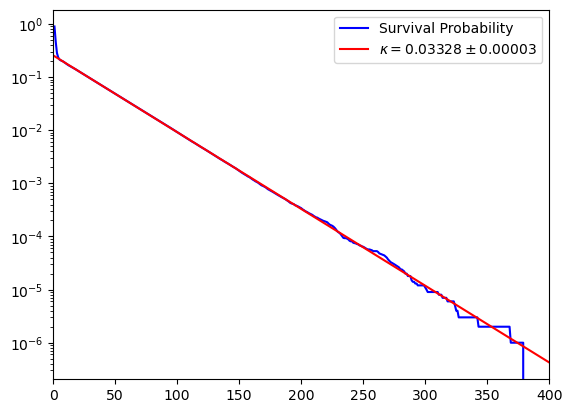

In [ ]:
plt.plot(times, survival_probability, color="blue", label="Survival Probability")
x_new = np.linspace(0, 400, 1000)
y_new = np.exp(coeffs[1]) * np.exp(coeffs[0] * x_new)
plt.plot(x_new, y_new, color="red", label=fr"$\kappa = {-coeffs[0]:.5f}\pm {np.sqrt(cov[0, 0]):.5f}$")
plt.legend()
plt.yscale("log")
plt.xlim(0, 400)

In [ ]:
tau = 1 / -coeffs[0]
tau

30.050106645348325

In [ ]:
n0 = 5
escape = [ds.escape_analysis(ic[i, :], parameters, round(n0 * tau), exists, escape="exiting") for i in range(num_ic)]
escape = np.array(escape)

In [ ]:
escape.shape

(1000000, 2)

In [ ]:
escape = escape[:, 0]

In [ ]:
non_escaping = np.where(escape == -1)

In [ ]:
non_escaping_ics = ic[non_escaping]

In [ ]:
non_escaping_ics.shape

(1714, 2)

In [ ]:
saddle = ds.trajectory(non_escaping_ics, parameters, round(n0 * tau / 2))

In [ ]:
unstable = ds.trajectory(non_escaping_ics, parameters, round(n0 * tau))

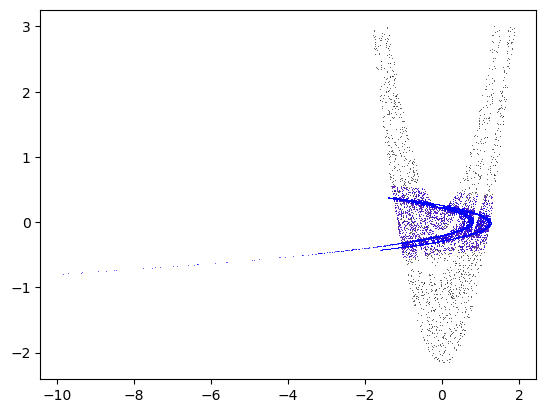

In [ ]:
plt.plot(non_escaping_ics[:, 0], non_escaping_ics[:, 1], "o", markersize=0.5, markeredgewidth=0,color="black", label="Non-escaping");
plt.plot(saddle[:, 0], saddle[:, 1], "o", markersize=0.5, markeredgewidth=0, color="red", label="Saddle");
plt.plot(unstable[:, 0], unstable[:, 1], "o", markersize=0.5, markeredgewidth=0, color="b", label="Saddle");
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [ ]:
plt.plot(saddle[:, 0], saddle[:, 1], "o", markersize=0.5, markeredgewidth=0, color="red", label="Saddle");
